In [5]:
import pandas as pd
import numpy as np
from scipy.stats import zscore
from sklearn.preprocessing import Imputer
from sklearn.metrics import accuracy_score
import seaborn as sns

In [7]:
%matplotlib inline

In [8]:
from scipy import stats
from sklearn import metrics
from sklearn.cross_validation import train_test_split
import matplotlib.pyplot as plt

C:\Users\TARUN AERVA TEJA\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [118]:
data = pd.read_csv('Wine_data.csv')

In [119]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [120]:
columnns = ['fixed_acidity','volatile_acidity','citric_acid','residual_sugar','chlorides','free_sulfur_dioxide','total_sulfur_dioxide','density','pH','sulphates','alcohol','quality']

In [121]:
data.columns = columnns

In [122]:
data.shape

(4898, 12)

In [124]:
print(data.head().T)

                            0        1        2         3         4
fixed_acidity           7.000    6.300   8.1000    7.2000    7.2000
volatile_acidity        0.270    0.300   0.2800    0.2300    0.2300
citric_acid             0.360    0.340   0.4000    0.3200    0.3200
residual_sugar         20.700    1.600   6.9000    8.5000    8.5000
chlorides               0.045    0.049   0.0500    0.0580    0.0580
free_sulfur_dioxide    45.000   14.000  30.0000   47.0000   47.0000
total_sulfur_dioxide  170.000  132.000  97.0000  186.0000  186.0000
density                 1.001    0.994   0.9951    0.9956    0.9956
pH                      3.000    3.300   3.2600    3.1900    3.1900
sulphates               0.450    0.490   0.4400    0.4000    0.4000
alcohol                 8.800    9.500  10.1000    9.9000    9.9000
quality                 6.000    6.000   6.0000    6.0000    6.0000


In [125]:
print(list(data.columns))

['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']


In [127]:
data.dtypes

fixed_acidity           float64
volatile_acidity        float64
citric_acid             float64
residual_sugar          float64
chlorides               float64
free_sulfur_dioxide     float64
total_sulfur_dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [129]:
data.dtypes

fixed_acidity           float64
volatile_acidity        float64
citric_acid             float64
residual_sugar          float64
chlorides               float64
free_sulfur_dioxide     float64
total_sulfur_dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [130]:
data.corr()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
fixed_acidity,1.000000,-0.022697,0.289181,0.089021,0.023086,-0.049396,0.091070,0.265331,-0.425858,-0.017143,-0.120881,-0.113663
volatile_acidity,-0.022697,1.000000,-0.149472,0.064286,0.070512,-0.097012,0.089261,0.027114,-0.031915,-0.035728,0.067718,-0.194723
citric_acid,0.289181,-0.149472,1.000000,0.094212,0.114364,0.094077,0.121131,0.149503,-0.163748,0.062331,-0.075729,-0.009209
residual_sugar,0.089021,0.064286,0.094212,1.000000,0.088685,0.299098,0.401439,0.838966,-0.194133,-0.026664,-0.450631,-0.097577
chlorides,0.023086,0.070512,0.114364,0.088685,1.000000,0.101392,0.198910,0.257211,-0.090439,0.016763,-0.360189,-0.209934
free_sulfur_dioxide,-0.049396,-0.097012,0.094077,0.299098,0.101392,1.000000,0.615501,0.294210,-0.000618,0.059217,-0.250104,0.008158
total_sulfur_dioxide,0.091070,0.089261,0.121131,0.401439,0.198910,0.615501,1.000000,0.529881,0.002321,0.134562,-0.448892,-0.174737
density,0.265331,0.027114,0.149503,0.838966,0.257211,0.294210,0.529881,1.000000,-0.093591,0.074493,-0.780138,-0.307123
pH,-0.425858,-0.031915,-0.163748,-0.194133,-0.090439,-0.000618,0.002321,-0.093591,1.000000,0.155951,0.121432,0.099427
sulphates,-0.017143,-0.035728,0.062331,-0.026664,0.016763,0.059217,0.134562,0.074493,0.155951,1.000000,-0.017433,0.053678


Firstly, we can divide all the variables as predictors and target variables.

***Predictors***: 'fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol'.

***Target***: 'Quality'.

As we can see that all the variables except the target variable are continuous(numeric) variables and each being a float(numeric) datatype.

In [131]:
data.isnull().any()

fixed_acidity           False
volatile_acidity        False
citric_acid             False
residual_sugar          False
chlorides               False
free_sulfur_dioxide     False
total_sulfur_dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

In [132]:
data.shape

(4898, 12)

As we can see, there are no missing values in the data.

In [133]:
data.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


We see that the target varaible(quality) has a minimum rating of 3 and an average rating of 6.

We can also see that all the attributes(features) are skewed towards right.

In [174]:
data.groupby('quality').count()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,20,20,20,20,20,20,20,20,20,20,20
4,163,163,163,163,163,163,163,163,163,163,163
5,1457,1457,1457,1457,1457,1457,1457,1457,1457,1457,1457
6,2198,2198,2198,2198,2198,2198,2198,2198,2198,2198,2198
7,880,880,880,880,880,880,880,880,880,880,880
8,175,175,175,175,175,175,175,175,175,175,175
9,5,5,5,5,5,5,5,5,5,5,5


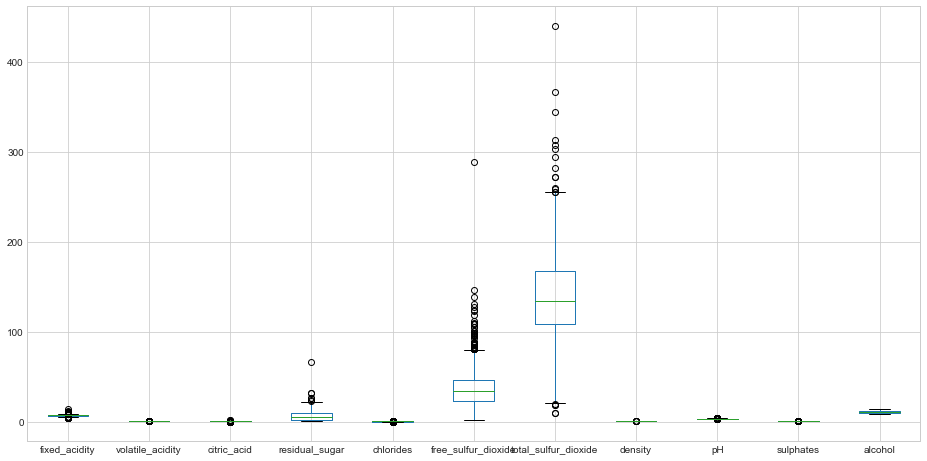

In [134]:
data.boxplot(column=['fixed_acidity','volatile_acidity','citric_acid','residual_sugar','chlorides','free_sulfur_dioxide','total_sulfur_dioxide','density','pH','sulphates','alcohol'], rot=0, grid=True, figsize=(16,8))

In [135]:
x = data.iloc[:,0:11]
y = data.iloc[:,11]

In [137]:
from scipy import stats
import numpy as np
data_z = np.abs(stats.zscore(data))
print(data_z)

[[1.72096961e-01 8.17699008e-02 2.13280202e-01 ... 3.49184257e-01
  1.39315246e+00 1.37870140e-01]
 [6.57501128e-01 2.15895632e-01 4.80011213e-02 ... 1.34184656e-03
  8.24275678e-01 1.37870140e-01]
 [1.47575110e+00 1.74519434e-02 5.43838363e-01 ... 4.36815783e-01
  3.36667007e-01 1.37870140e-01]
 ...
 [4.20473102e-01 3.79435433e-01 1.19159198e+00 ... 2.61552731e-01
  9.05543789e-01 1.37870140e-01]
 [1.60561323e+00 1.16673788e-01 2.82557040e-01 ... 9.62604939e-01
  1.85757201e+00 1.26711420e+00]
 [1.01304317e+00 6.77100966e-01 3.78559282e-01 ... 1.48839409e+00
  1.04489089e+00 1.37870140e-01]]


In [138]:
threshold = 3
print(np.where(data_z > 3))

(array([  17,   20,   23,   40,   41,   54,   72,   98,  147,  154,  169,
        178,  182,  191,  194,  195,  196,  207,  207,  221,  227,  230,
        250,  251,  253,  268,  269,  271,  294,  294,  296,  315,  325,
        325,  339,  358,  372,  395,  405,  445,  450,  470,  484,  508,
        525,  531,  556,  600,  646,  659,  683,  687,  687,  700,  729,
        740,  745,  757,  758,  759,  771,  772,  774,  775,  820,  821,
        827,  830,  834,  852,  854,  859,  866,  873,  873,  876,  877,
        878,  926,  946,  948,  974,  979,  979,  980,  980, 1014, 1016,
       1024, 1029, 1034, 1034, 1034, 1036, 1040, 1051, 1051, 1053, 1123,
       1124, 1152, 1158, 1163, 1171, 1178, 1180, 1214, 1217, 1217, 1228,
       1229, 1239, 1245, 1245, 1250, 1254, 1254, 1255, 1257, 1263, 1272,
       1282, 1293, 1294, 1304, 1304, 1307, 1309, 1312, 1326, 1335, 1352,
       1369, 1369, 1372, 1373, 1385, 1386, 1394, 1401, 1417, 1417, 1418,
       1419, 1423, 1423, 1436, 1440, 1445, 1455, 1

In [139]:
#data2 = data.drop(labels = 'quality',axis = 1)

In [140]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

fixed_acidity            1.000000
volatile_acidity         0.110000
citric_acid              0.120000
residual_sugar           8.200000
chlorides                0.014000
free_sulfur_dioxide     23.000000
total_sulfur_dioxide    59.000000
density                  0.004377
pH                       0.190000
sulphates                0.140000
alcohol                  1.900000
quality                  1.000000
dtype: float64


In [141]:
out = (data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))

In [142]:
out.shape

(4898, 12)

In [143]:
data_out = data[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]
data_out.shape

(3854, 12)

In [312]:
data_out.groupby('quality').count()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
4,89,89,89,89,89,89,89,89,89,89,89
5,1106,1106,1106,1106,1106,1106,1106,1106,1106,1106,1106
6,1862,1862,1862,1862,1862,1862,1862,1862,1862,1862,1862
7,797,797,797,797,797,797,797,797,797,797,797


As we can see, the shape of the data frame before(out) and after the removal of outliers(data_out) changed. This indicates that there were outliers present in the data.

Yes, we definitely need to worry about the outliers.

We need to convert the feature 'quality' to a categorical data type

In [271]:
data['quality'] = data.quality.astype('category')

In [272]:
data.dtypes

fixed_acidity            float64
volatile_acidity         float64
citric_acid              float64
residual_sugar           float64
chlorides                float64
free_sulfur_dioxide      float64
total_sulfur_dioxide     float64
density                  float64
pH                       float64
sulphates                float64
alcohol                  float64
quality                 category
dtype: object

In [317]:
data_out['quality'] = data_out.quality.astype('category')

C:\Users\TARUN AERVA TEJA\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


# Since there are outliers in the data, i am removing those items and using the dataset without any outliers(data_out)

# data_out is the dataset without any outliers

# Using Dataset which doent contain Outliers

# Decision Trees(CART)

**Since, we have many classes within the quality feature(5,6,4,7) we can bring it down to 0 and 1(i.e., binary variable)**

In [430]:
data_out=data_out.replace(5, 1)
data_out=data_out.replace(6, 1)
data_out = data_out.replace(4, 0)
data_out=data_out.replace(7, 0)

In [431]:
data_out.groupby('quality').count()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
0,886,886,886,886,886,886,886,886,886,886,886
1,2968,2968,2968,2968,2968,2968,2968,2968,2968,2968,2968


In [432]:
data_out['quality'] = data_out.quality.astype('category')

In [433]:
data_out.dtypes

fixed_acidity            float64
volatile_acidity         float64
citric_acid              float64
residual_sugar           float64
chlorides                float64
free_sulfur_dioxide      float64
total_sulfur_dioxide     float64
density                  float64
pH                       float64
sulphates                float64
alcohol                  float64
quality                 category
dtype: object

In [413]:
content = data_out.iloc[:,0:11]

In [414]:
target = data_out.iloc[:,11]


In [374]:
content_z = content.apply(zscore)

In [415]:
target.dtype

CategoricalDtype(categories=[0, 1], ordered=False)

In [416]:
X_train1, X_test1, y_train1, y_test1 = train_test_split (content_z, target, test_size = 0.2, 
                                                     random_state = 0)

In [437]:
from sklearn.model_selection import cross_val_score

In [438]:
score = cross_val_score(DT2learn, content_z,target, cv=10)

print()
for i in range(10):
    print("Fold-" + str(i + 1) + ":", "%0.2f" % score[i])
print()
print("Mean: %0.2f" % score.mean())
print("Accuration: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))


Fold-1: 0.77
Fold-2: 0.76
Fold-3: 0.78
Fold-4: 0.78
Fold-5: 0.77
Fold-6: 0.80
Fold-7: 0.76
Fold-8: 0.81
Fold-9: 0.80
Fold-10: 0.70

Mean: 0.77
Accuration: 0.77 (+/- 0.06)


In [420]:
from sklearn.tree import DecisionTreeClassifier 
DT = DecisionTreeClassifier(criterion="gini",max_depth=3, random_state = 0)
DT.fit(content_z,target)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [421]:
predicted_labels = DT.predict(X_test1)

In [422]:
score = accuracy_score(y_test1, predicted_labels)
print(score)

0.7626459143968871


**Accuracy for Decision Tree is 76.264%**

# Using Naive Bayes

In [417]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

GNBlearn = gnb.fit(content_z, target)

In [397]:
GNBlearn

GaussianNB(priors=None)

In [439]:
from sklearn.model_selection import cross_val_score

score = cross_val_score(GNBlearn, content_z, target, cv=10)

print()
for i in range(10):
    print("Fold-" + str(i + 1) + ":", "%0.2f" % score[i])
print()
print("Mean: %0.2f" % score.mean())
print("Accuration: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))


Fold-1: 0.83
Fold-2: 0.73
Fold-3: 0.74
Fold-4: 0.74
Fold-5: 0.76
Fold-6: 0.68
Fold-7: 0.67
Fold-8: 0.69
Fold-9: 0.67
Fold-10: 0.65

Mean: 0.72
Accuration: 0.72 (+/- 0.11)


In [418]:
gnb.fit(X_train1, y_train1)

GaussianNB(priors=None)

In [419]:
expected = y_test1
predicted = gnb.predict(X_test1)
# summarize the fit of the model
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

             precision    recall  f1-score   support

          0       0.39      0.54      0.45       177
          1       0.85      0.75      0.80       594

avg / total       0.74      0.70      0.72       771

[[ 95  82]
 [146 448]]


# Using KNN Classifier

In [401]:
from sklearn import neighbors, datasets

In [442]:
KNNlearn = neighbors.KNeighborsClassifier(21, weights='uniform',metric='chebyshev')
KNNlearn.fit(content_z,target)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='chebyshev',
           metric_params=None, n_jobs=1, n_neighbors=21, p=2,
           weights='uniform')

In [443]:
score = cross_val_score(KNNlearn, content_z, target, cv=10)

print()
for i in range(10):
    print("Fold-" + str(i + 1) + ":", "%0.2f" % score[i])
print()
print("Mean: %0.2f" % score.mean())
print("Accuration: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))


Fold-1: 0.79
Fold-2: 0.79
Fold-3: 0.78
Fold-4: 0.77
Fold-5: 0.80
Fold-6: 0.81
Fold-7: 0.75
Fold-8: 0.77
Fold-9: 0.79
Fold-10: 0.73

Mean: 0.78
Accuration: 0.78 (+/- 0.04)


In [444]:
def getAccuracy(testSet, predictions):
	correct = 0
	for x in range(len(testSet)):
		if testSet[x][-1] is predictions[x]:
			correct += 1
	return (correct/float(len(testSet))) * 100.0

In [445]:
KNNlearn.fit(X_train1, y_train1)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='chebyshev',
           metric_params=None, n_jobs=1, n_neighbors=21, p=2,
           weights='uniform')

In [446]:
predicted_labels = KNNlearn.predict(X_test1)

In [447]:
accuracy_score1 = accuracy_score(y_test1, predicted_labels)

In [448]:
print(accuracy_score1)

0.7821011673151751


**Accuracy for KNN is 78.21%**

# So, finally we are able to classify the data by bringing down the quality variable(which has multiple classes) to binary type varaible(with 0 and 1)

# We use KNN classifier to classify because here the accuracy is maximum among all other calssfiers and also since it is very fast and can handle outliers pretty well, it is better to adapt KNN Classifier method.